In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import math
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.metrics import accuracy_score

#from skrebate import ReliefF
from ReliefF import ReliefF
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from yellowbrick.features.pca import PCADecomposition
# from skrebate import ReliefF

import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('Breast.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 24482 entries, Contig45645_RC to Class
dtypes: float64(24188), int64(293), object(1)
memory usage: 18.1+ MB


In [7]:
data.head()

,Contig45645_RC,Contig44916_RC,D25272,J00129,Contig29982_RC,Contig26811,D25274,Contig36292,Contig42854,Contig34839,...,NM_000898,NM_000899,Contig20164_RC,Contig8985_RC,Contig36062_RC,Contig35333_RC,Contig62037_RC,AF067420,Contig15167_RC,Class
0,-0.299,0.093,-0.215,-0.566,-0.596,-0.195,0.039,-0.409,-0.352,0.066,...,-0.960,-0.211,0.155,-0.095,-0.025,-0.037,0.215,0.307,0.321,relapse
1,-0.081,0.009,-0.091,-0.518,-0.502,-0.149,0.098,-0.090,0.138,0.061,...,-0.531,-0.020,0.014,-0.123,0.148,0.024,-0.070,-0.209,0.105,relapse
2,-0.125,0.070,-0.006,-0.575,-0.585,-0.183,0.102,0.023,-0.350,-0.005,...,-0.883,-0.159,0.022,0.006,-0.086,0.019,0.026,-0.822,0.199,relapse
3,-0.270,0.123,0.056,-0.499,-0.402,-0.099,-0.145,-0.103,0.181,0.236,...,-0.044,-0.096,0.018,0.000,0.076,0.057,-0.016,-0.360,-0.038,relapse
4,-0.141,0.025,-0.031,-0.465,-0.533,-0.065,0.101,-0.008,-0.019,0.026,...,0.280,-0.088,0.043,0.207,-0.124,-0.041,-0.077,-0.432,-0.015,relapse


In [8]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [9]:
x.head

<bound method NDFrame.head of     Contig45645_RC  Contig44916_RC  D25272  J00129  Contig29982_RC  \
0           -0.299           0.093  -0.215  -0.566          -0.596   
1           -0.081           0.009  -0.091  -0.518          -0.502   
2           -0.125           0.070  -0.006  -0.575          -0.585   
3           -0.270           0.123   0.056  -0.499          -0.402   
4           -0.141           0.025  -0.031  -0.465          -0.533   
..             ...             ...     ...     ...             ...   
92           1.058          -0.037   0.053  -0.667           0.198   
93           0.105           0.021   0.022  -0.527          -0.286   
94          -0.167          -0.047  -0.146  -0.607          -0.482   
95          -0.195          -0.097  -0.153  -0.731          -0.432   
96           0.182          -0.081  -0.133  -0.731          -0.092   

    Contig26811  D25274  Contig36292  Contig42854  Contig34839  ...  \
0        -0.195   0.039       -0.409       -0.352        0

In [10]:
y.head

<bound method NDFrame.head of 0         relapse
1         relapse
2         relapse
3         relapse
4         relapse
         ...     
92    non-relapse
93    non-relapse
94    non-relapse
95    non-relapse
96    non-relapse
Name: Class, Length: 97, dtype: object>

In [9]:
data.shape

(97, 24482)

In [10]:
#convert relapse to 1 , non-relapse to 0 
data.loc[data['Class'] == 'non-relapse', ['Class']] = 0
data.loc[data['Class'] == 'relapse', ['Class']] = 1

In [11]:
y.head()

0    relapse
1    relapse
2    relapse
3    relapse
4    relapse
Name: Class, dtype: object

In [12]:
data = data.apply(pd.to_numeric)
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [13]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [40]:
#check whether there is a null values
data.isnull().sum()

Contig45645_RC    0
Contig44916_RC    0
D25272            0
J00129            0
Contig29982_RC    0
                 ..
Contig35333_RC    0
Contig62037_RC    0
AF067420          0
Contig15167_RC    0
Class             0
Length: 24482, dtype: int64

In [14]:
max=data.max()
min=data.min()
print(max)
print(min)

Contig45645_RC    100.000
Contig44916_RC    100.000
D25272            100.000
J00129              1.551
Contig29982_RC      2.000
                   ...   
Contig35333_RC      0.643
Contig62037_RC    100.000
AF067420            0.765
Contig15167_RC      2.000
Class               1.000
Length: 24482, dtype: float64
Contig45645_RC   -2.000
Contig44916_RC   -0.727
D25272           -0.943
J00129           -2.000
Contig29982_RC   -1.927
                  ...  
Contig35333_RC   -0.155
Contig62037_RC   -1.159
AF067420         -2.000
Contig15167_RC   -0.410
Class             0.000
Length: 24482, dtype: float64


In [15]:
x.describe()

,Contig45645_RC,Contig44916_RC,D25272,J00129,Contig29982_RC,Contig26811,D25274,Contig36292,Contig42854,Contig34839,...,NM_000895,NM_000898,NM_000899,Contig20164_RC,Contig8985_RC,Contig36062_RC,Contig35333_RC,Contig62037_RC,AF067420,Contig15167_RC
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,...,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,0.928464,1.052608,1.005588,-0.529052,-0.342526,-0.004000,-0.017732,1.058412,-0.092041,1.088021,...,-0.023320,-0.271619,0.012938,0.054278,0.006959,-0.009423,0.021485,1.074505,-0.290825,0.063701
std,10.170854,10.152569,10.158397,0.489285,0.433175,0.388482,0.117686,10.153364,0.233481,10.149493,...,0.153076,0.497188,0.140622,0.139511,0.112433,0.152194,0.121273,10.151730,0.492553,0.241290
min,-2.000000,-0.727000,-0.943000,-2.000000,-1.927000,-2.000000,-0.487000,-0.409000,-0.454000,-0.198000,...,-0.435000,-1.215000,-0.302000,-0.199000,-0.270000,-0.285000,-0.155000,-1.159000,-2.000000,-0.410000
25%,-0.261000,-0.051000,-0.146000,-0.750000,-0.533000,-0.148000,-0.094000,-0.099000,-0.241000,-0.050000,...,-0.093000,-0.586000,-0.084000,-0.019000,-0.061000,-0.124000,-0.058000,-0.077000,-0.577000,-0.030000
50%,-0.134000,0.033000,0.001000,-0.569000,-0.406000,-0.036000,-0.008000,-0.005000,-0.115000,0.033000,...,-0.023000,-0.337000,-0.003000,0.027000,0.007000,-0.031000,-0.006000,0.021000,-0.300000,0.051000
75%,0.074000,0.086000,0.070000,-0.455000,-0.215000,0.113000,0.065000,0.124000,0.003000,0.106000,...,0.078000,0.120000,0.118000,0.115000,0.068000,0.076000,0.070000,0.183000,-0.036000,0.105000
max,100.000000,100.000000,100.000000,1.551000,2.000000,2.000000,0.198000,100.000000,1.139000,100.000000,...,0.330000,1.212000,0.445000,0.873000,0.353000,0.577000,0.643000,100.000000,0.765000,2.000000


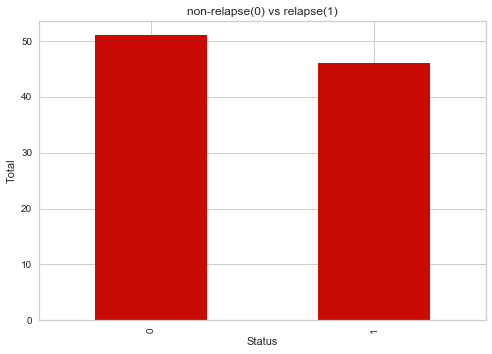

In [42]:

data['Class'].value_counts().plot(kind='bar', color="r")
plt.title("non-relapse(0) vs relapse(1)")
plt.xlabel('Status')
plt.ylabel('Total')
plt.show()

In [23]:
kf = KFold(n_splits=8, random_state=20)
kf.get_n_splits(x)

8

In [17]:
def minmax_scaler(X_train_, X_test_):
    scaler = MinMaxScaler()
    X_train_minmax = scaler.fit_transform(X_train_)
    X_train_ = pd.DataFrame(X_train_minmax, columns=X_train_.columns)
    X_test_minmax = scaler.transform(X_test_)
    X_test_ = pd.DataFrame(X_test_minmax, columns=X_test_.columns)
    return X_train_,X_test_























In [18]:
def k_means(X_train_):
    X_train_transpose = X_train_.transpose()
    model_kme = KMeans(n_clusters= 6)
    model_kme.fit(X_train_transpose)
    pred_kme = model_kme.predict(X_train_transpose)
    X_train_transpose_clustered = X_train_transpose.copy()
    X_train_transpose_clustered['cluster'] = pred_kme 
    return X_train_transpose_clustered

In [19]:
def relief_method(X_train_transpose_clusteredx, X_train_,y_train_, label_cluster):
    n_features_to_keep = 8
    n_neighbors = X_train_.shape[0]-1
    Train = pd.DataFrame()
    for i in label_cluster:
        X_train_transpose_clustered_ = X_train_transpose_clusteredx[X_train_transpose_clusteredx['cluster']==i]
        X_train_clustered_ = X_train_transpose_clustered_.drop(['cluster'],axis=1).transpose()
        fs = ReliefF(n_neighbors=n_neighbors, n_features_to_keep=n_features_to_keep)
        X_train_selected = fs.fit_transform(X_train_clustered_.values, y_train_)
        top_features = fs.top_features[0:n_features_to_keep]
        for j in top_features:
            if Train.shape == (0,0):
                Train = X_train_[[find_column(X_train_, X_train_clustered_, j,Train.columns)]]
            else:
                Train = Train.join(X_train_[[find_column(X_train_, X_train_clustered_, j,Train.columns)]])
    return Train

In [20]:
def prepare_data(Train_,X_test_):
    X_train_ = Train_.copy()
    X_test_ = X_test_[X_train_.columns]
    return X_train_,X_test_

In [26]:
print(kf)
scoring = []
for train_index, test_index in kf.split(x):
    print(train_index)
    print('____--')
    print(test_index)
    X_train, X_test = x[train_index], x[test_index]

KFold(n_splits=8, random_state=20, shuffle=False)
[13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84
 85 86 87 88 89 90 91 92 93 94 95 96]
____--
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


KeyError: "None of [Int64Index([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,\n            30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,\n            47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,\n            64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,\n            81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96],\n           dtype='int64')] are in the [columns]"